### Simulating From the Null Hypothesis

Load in the coffee drinker dataset, and use the exercises to assist with answering the quiz questions below.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

In [10]:
full_data = pd.read_csv('../../Data/coffee_dataset.csv')
sample_data = full_data.sample(200)[['height','drinks_coffee']]
sample_data.head()

,height,drinks_coffee
2402,64.357154,True
2864,66.859636,True
2167,66.659561,False
507,70.166241,True
1817,71.369120,True


`1.` If you were interested in studying whether the average height for coffee drinkers is the same as for non-coffee drinkers, what would the null and alternative hypotheses be?  
Answer:
$$\begin{align}H_0:&\quad\mu_c=\mu_n\\ H_A:&\quad\mu_c\neq\mu_n\end{align}$$
where $\mu_c$ is the average height of coffee drinkers and $\mu_n$ is the average height of non-coffee drinkers.

`2.` If you were interested in studying whether the average height for coffee drinkers is less than non-coffee drinkers, what would the null and alternative hypotheses be?  
Answer:
$$\begin{align}H_0:&\quad\mu_c\geq\mu_n\\ H_A:&\quad\mu_c\lt\mu_n\end{align}$$

`3.` For 10,000 iterations: bootstrap the sample data, calculate the mean height for coffee drinkers and non-coffee drinkers, and calculate the difference in means for each sample.  You will want to have three arrays at the end of the iterations - one for each mean and one for the difference in means.

diffs mean:  1.3297291817668597
lower:  0.4242171319564051
upper:  2.2442001993756864


(array([   9.,  100.,  558., 1630., 2634., 2664., 1637.,  603.,  143.,
          22.]),
 array([65.30919181, 65.6036443 , 65.89809678, 66.19254927, 66.48700175,
        66.78145424, 67.07590673, 67.37035921, 67.6648117 , 67.95926418,
        68.25371667]),
 <BarContainer object of 10 artists>)

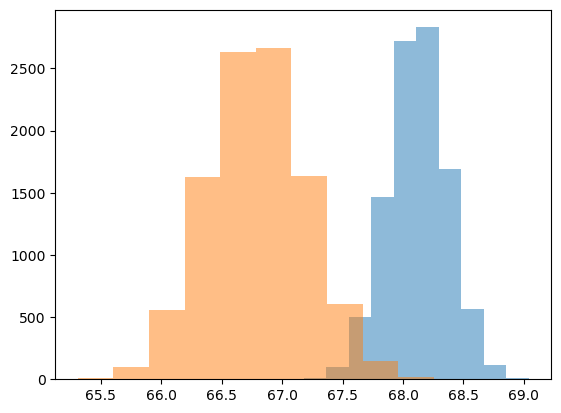

In [29]:
coffee_means = []
no_coffee_means = []
diffs = []

for _ in range(10000):
    bootsamp = sample_data.sample(200, replace=True)
    coffee_mean = bootsamp[bootsamp['drinks_coffee']==True]['height'].mean()
    no_coffee_mean = bootsamp[bootsamp['drinks_coffee']==False]['height'].mean()
    coffee_means.append(coffee_mean)
    no_coffee_means.append(no_coffee_mean)
    diffs.append(coffee_mean - no_coffee_mean)

print('diffs mean: ', np.mean(diffs))

lower, upper = np.percentile(diffs, 2.5), np.percentile(diffs, 97.5)
print('lower: ', lower)
print('upper: ', upper)

plt.hist(coffee_means, alpha=0.5)
plt.hist(no_coffee_means, alpha=0.5)

`4.` Now, use your observed sampling distribution for the difference in means and [the docs](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to simulate what you would expect the sampling distribution to be if the null hypothesis is true. You can do this be recentering your distribution at zero. Also, calculate the observed sample mean difference in `sample_data`. Use your solutions to answer the last questions in the quiz below.

In [16]:
coffee_std = np.std(coffee_means)
no_coffee_std = np.std(no_coffee_means)
diffs_std = np.std(diffs)
print('coffee std: ', coffee_std)
print('no coffee std: ', no_coffee_std)
print('diffs std: ', diffs_std)
print('computed diff std: ', np.sqrt(np.std(coffee_means)**2 + np.std(no_coffee_means)**2))

coffee std:  0.24521624584276142
no coffee std:  0.40236222052505044
diffs std:  0.4702586566363951
computed diff std:  0.4711967356965315


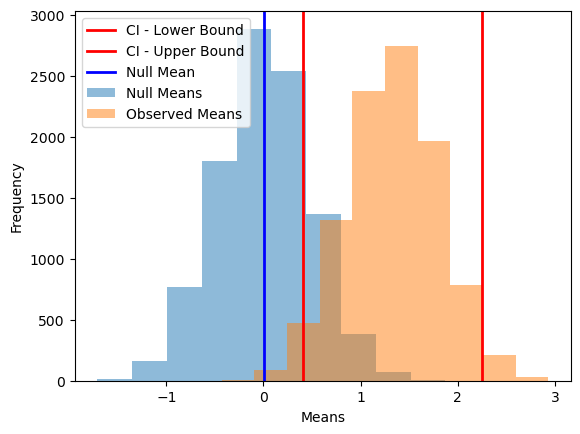

In [28]:
null_vals = np.random.normal(0, diffs_std, 10000)
plt.hist(null_vals, alpha=0.5)
plt.hist(diffs, alpha=0.5)
plt.axvline(x=lower, color='r', linewidth=2)
plt.axvline(x=upper, color='r', linewidth=2)
plt.axvline(x=np.mean(null_vals), color='b', linewidth=2)
plt.xlabel('Means')
plt.ylabel('Frequency')
plt.legend(['CI - Lower Bound', 'CI - Upper Bound', 'Null Mean', 'Null Means', 'Observed Means'])

##### Question
To recap, what can we say is `True` about the sampling distribution?  
Answer:
* We can expect the standard deviation of the sampling distribution for differences from the null to be essentially the same as what we observed from the data.
* If the null hypothesis is true, we would expect the difference in means of coffee drinkers and non-coffee drinkers to be zero.

### Quiz

##### Question 1
For each of the following, state whether we reject or fail to reject $H_0$.

| p-value/$\alpha$ | Conclusion |
| --- | --- |
| p-value = $0.03$, $\alpha=0.05$ | Reject |
| p-value = $0.20$, $\alpha=0.01$ | Fail to Reject |
| p-value = $0.10$, $\alpha=0.05$ | Fail to Reject |

##### Question 2
Match each of the following with the correct definition.

| Definition | Term |
| --- | --- |
| The threshold for Type I errors. | $\alpha$ |
| The worst type of error. | Type I error |
| Deciding the null is true, but really the alternative is true. | Type II error |
| Deciding the alternative is true, but really the null is true. | Type I error |
| The choice made when the p-value is less than alpha. | Reject the null hypothesis |